In [ ]:
import pandas as pd     

In [19]:
values = [
    "19.10", 
    "6.31", 
    "18.97", 
    "18.10", 
    "19.28", 
    "18.54", 
    "15", 
    "12.7", 
    "19.33", 
    "20.73", 
    "27.45", 
    "18.57", 
    "21.43", 
    "18.867", 
    "18.83", 
    "19.03", 
    "17.88", 
    "21.72", 
    "17.45", 
    "Classification based", 
    "5.5", 
 "19.47", 
    "18.8", 
    "6.3", 
    "21.46", 
    "4.14, 8.01", 
    "49.9", 
    "8.29", 
    "11.08, 19.25", 
    "18.92", 
    "21.16", 
    "18.93", 
    "Not clear, even the unit is not clear", 
    "20.1", 
    "19.53", 
    "19.48", 
    "29.54", 
    "19.64", 
    "18.34", 
    "18.26", 
    "4.87", 
    "16.06", 
    "6.42", 
    "18.2", 
    "3.03", 
    "7.45, 6.43", 
    "9.38", 
    "90% Correct", 
    "28.91", 
    "23.219", 
    "21.90", 
    "Not discuss algorithm design,but discussion system design", 
    "19.57", 
    "14.76", 
    "11.38"
]

sampling_horizons = [
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "NA", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "60", 
    "30", 
    "30", 
    "NA", 
    "30", 
    "30", 
    "30", 
    "60", 
    "30", 
    "30", 
    "120", 
    "15", 
    "30", 
    "30", 
    "30", 
    "30", 
    "NA", 
    "30", 
    "30", 
    "30", 
    "60", 
    "30", 
    "30", 
    "30", 
    "30 (APE)", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "30", 
    "CEG", 
    "30", 
    "30", 
    "30", 
    "NA", 
    "30", 
    "30", 
    "120 (R)"
]

In [20]:
evaluation_responses = [
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "No",
    "Yes",
    "No",
    "No",
    "Yes",
    "Yes",
    "No",
    "Yes",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Partly",
    "Yes",
    "No",
    "Partly",
    "Yes",
    "Yes",
    "No",
    "Partly",
    "Yes",
    "Partly",
    "No",
    "Yes",
    "Yes",
    "Yes",
    "Partly",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Partly",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Yes",
    "Partly",
    "Partly",
    "Partly",
    "Yes",
    "Other",
    "Yes",
    "Yes",
    "Partly",
    "Yes"
]


In [21]:
public_datasets = [
    "OhioT1DM",
    "DirecNet",
    "OhioT1DM, ShanghaiT1DM, ShanghaiT2DM",
    "OhioT1DM",
    "UVA/Padova Simulator, ABC4D, OhioT1DM",
    "OhioT1DM, ARISES, ABC4D",
    "UVA/Padova Simulator",
    "OhioT1DM, ShanghaiT1DM, ShanghaiT2DM",
    "OhioT1DM",
    None,
    "UCI Machine Learning Repository",
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM",
    "DirecNet",
    "UVA/Padova Simulator",
    "RT-CGM",
    "OhioT1DM",
    "ShanghaiT1DM",
    "SUCH",
    "DirecNet, AI4PG",
    "MIMIC-III",
    "ShanghaiT1DM, ShanghaiT2DM",
    None,
    "OhioT1DM",
    "UVA/Padova Simulator, Open-sourced dataset",
    "OhioT1DM",
    None,
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM",
    "DirecNet",
    "OhioT1DM",
    "OhioT1DM",
    "OhioT1DM, DCLP3, DCLP5, RT",
    None,
    "OhioT1DM",
    "AIDA Simulator",
    "OhioT1DM",
    "RT-CGM",
    None,
    "UVA/Padova Simulator",
    None,
    "DirecNet",
    "DirecNet",
    "OhioT1DM",
    None,
    "OhioT1DM",
    "OhioT1DM",
    "GEM-GDM"
]

In [22]:
# Which index is "classification based in the values list?"
# 19
# remove 19th index from all lists
values.pop(19)
sampling_horizons.pop(19)
evaluation_responses.pop(19)
public_datasets.pop(19)

# also pop the 4th from last as this paper discussed system design
values.pop(-4)
sampling_horizons.pop(-4)
evaluation_responses.pop(-4)
public_datasets.pop(-4)

In [23]:
# Initial Preprocessing
"""
Removes unnecessary columns and renames the first column to 'Paper'
"""

df = pd.read_csv('./Recent paper in BG prediction since 2019 - cross_check.csv')
# rename Unnamed: 0 to paper name

df.rename(columns={'Unnamed: 0':'Paper'}, inplace=True)
# find column number with Link.1
col_num = df.columns.get_loc("Link.1")
# remove columns from Link.1 to the end
df = df.iloc[:, :col_num]
df['best_reported_metric'] = values
df['best_reported_sh'] = sampling_horizons
# remove rows that are mostly NA
print(f"length before dropping NA: {len(df)}")
df = df.dropna(thresh=10) 
print(f"length after dropping NA: {len(df)}")
df.columns
df['Public Datasets'] = public_datasets
df['Public Datasets'] = df['Public Datasets'].apply(lambda x: x.strip().replace(',', ',').replace("\"", "") if type(x) == str else x)
df['Private Datasets'] = df['Private Datasets'].apply(lambda x: x.strip().replace(',', '').replace("\"", "") if type(x) == str else x)
df['Hyperparameter Status'] = df['Hyperparameter Status'].apply(lambda x: x.strip().replace(',', '').replace("\"", "") if type(x) == str else x)
df['best_reported_metric'] = df['best_reported_metric'].apply(lambda x: x.strip().replace('', '').replace("\"", "") if type(x) == str else x)
df['best_reported_sh'] = df['best_reported_sh'].apply(lambda x: x.strip().replace('', '').replace("\"", "") if type(x) == str else x)

length before dropping NA: 53
length after dropping NA: 53


In [24]:
"""
Generates a new column 'Status' based on the availability of Public and Private Datasets
"""

df['Public Datasets'] = df['Public Datasets'].apply(lambda x: None if x == "None" else x)
df['Private Datasets'] = df['Private Datasets'].apply(lambda x: None if x == "None" else x)

df['Status'] = df.apply(
    lambda x: 'Both' if pd.notna(x['Public Datasets']) and pd.notna(x['Private Datasets']) 
    else 'Public' if pd.notna(x['Public Datasets']) 
    else 'Private' if pd.notna(x['Private Datasets']) 
    else 'Unknown', 
    axis=1
)

len(df)

53

## Creating the Plots
Code Availability

Text(0.5, 1.0, 'Code Availability')

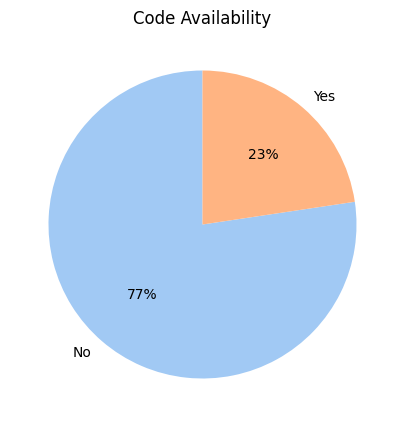

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt
# set pallette to pastel
sns.set_palette("pastel")
# pie chart of code availability

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y = df['Code Available?'].value_counts()
ax.pie(y, labels=y.index, autopct='%1.0f%%', startangle=90)
ax.set_title('Code Availability')


Status of the datasets

Text(0.5, 1.0, 'Status of Datasets')

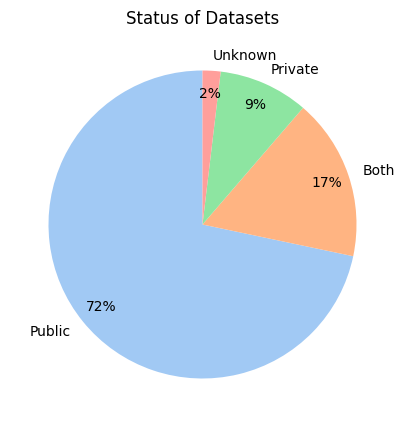

In [26]:
import seaborn as sns 
import matplotlib.pyplot as plt

# pie chart of code availability

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['Status'].value_counts()
def autopct_format(pct):
    return ('%1.0f%%' % pct) if pct > 3 else ('%1.0f%%' % pct)

ax.pie(y, labels=y.index, autopct=autopct_format, startangle=90, pctdistance=0.85, labeldistance=1.1)
ax.set_title('Status of Datasets')

# don't render the plot


Text(0.5, 1.0, 'Hyperparameters Reported?')

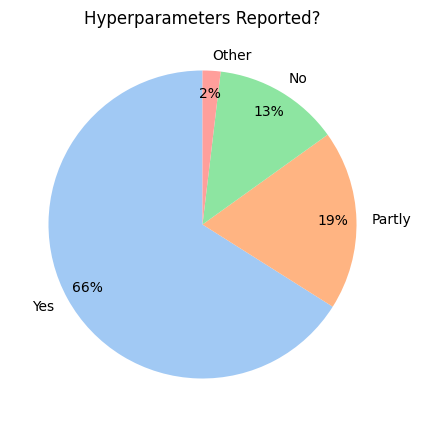

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Pie chart of code availability
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['Hyperparameter Status'].value_counts()
# Convert to percentages    
y = y / y.sum() * 100

# Adjust pctdistance so labels stay within the slice
ax.pie(y, labels=y.index, autopct='%1.0f%%', startangle=90, pctdistance=0.85)
ax.set_title('Hyperparameters Reported?')


['30' '30' '30' '30' '30' '30' '30' '30' '30' '30' 'NA' '30' '30' '30'
 '30' '30' '60' '30' '30' '30' '30' '30' '60' '30' '30' '120' '15' '30'
 '30' '30' '30' 'NA' '30' '30' '30' '60' '30' '30' '30' '30 (APE)' '30'
 '30' '30' '30' '30' '30' 'CEG' '30' '30' '30' '30' '30' '120 (R)']


Text(0.5, 1.0, 'Reported Prediction Horizon (30 min priority)')

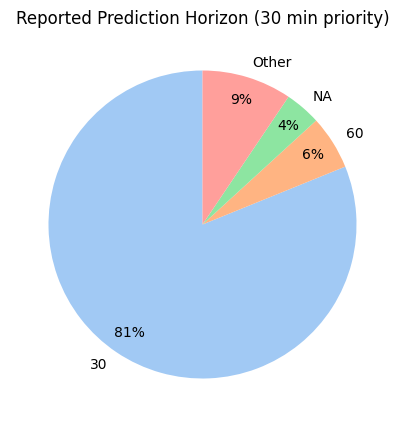

In [28]:
# pie chart of best reported sampling horizon

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['best_reported_sh'].values
print(y)
# split on the comma
y = pd.Series([i for x in y for i in x.split(',')])
y = y.str.strip()
# get the value counts
y = y.value_counts()

# merge the ones with 1 count into a single category
y.loc['Other'] = y[y == 1].sum()
y = y[y > 1]

# Convert to percentages
y = y / y.sum() * 100

ax.pie(y, labels=y.index, autopct=lambda p: f'{p:.0f}%', startangle=90, pctdistance=0.85)
ax.set_title('Reported Prediction Horizon (30 min priority)')

# don't render the plot



Bar Charts for Datasets

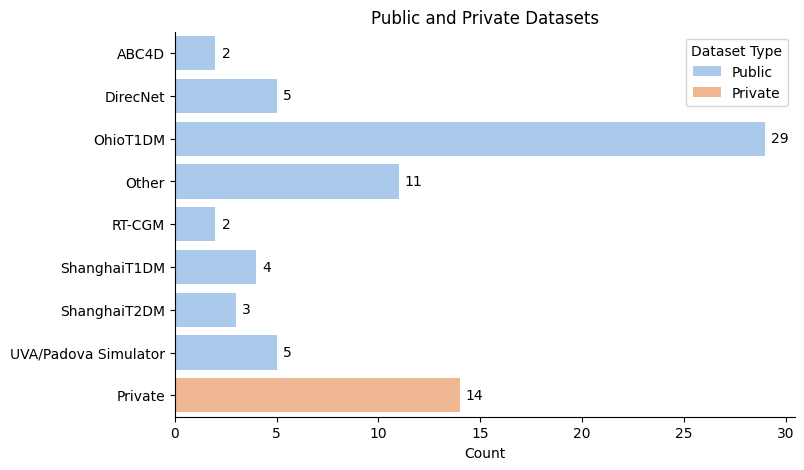

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Process public datasets
public_datasets = df['Public Datasets'].dropna().str.split(',').explode().str.strip()
public_datasets = public_datasets.value_counts().reset_index()
public_datasets.columns = ['Databases', 'Count']

# Group all counts of 1 into "Other"
public_datasets.loc[public_datasets['Count'] == 1, 'Databases'] = 'Other'
public_datasets = public_datasets.groupby('Databases', as_index=False).sum()

# Rename Soonchunhyang dataset to SCH for better labelling
df['Public Datasets'] = df['Public Datasets'].apply(lambda x: x.strip().replace('Soonchunhyang University Cheonan', 'SCH') if isinstance(x, str) else x)
df['Private Datasets'] = df['Private Datasets'].apply(lambda x: x.strip().replace('Soonchunhyang University Cheonan', 'SCH') if isinstance(x, str) else x)

# Process private datasets
private_datasets = df['Private Datasets'].dropna().str.split(',').explode().str.strip()

# Remove empty strings if any
private_datasets = private_datasets[private_datasets != '']

# Aggregate private datasets into one category
private_datasets_counts = pd.DataFrame({'Databases': ['Private'], 'Count': [private_datasets.count()]})

# Merge public and private datasets
merged_datasets = pd.concat([public_datasets, private_datasets_counts], ignore_index=True)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=merged_datasets, x='Count', y='Databases', hue=merged_datasets['Databases'].eq('Private').map({True: 'Private', False: 'Public'}))

# Add text labels
for i, v in enumerate(merged_datasets['Count']):
    plt.text(v + 0.3, i, str(v), color='black', va='center')

sns.despine()
plt.xlabel("Count")
plt.ylabel("")
plt.title("Public and Private Datasets")
plt.legend(title="Dataset Type")

plt.show()


In [30]:
# get the best reported metric for 
# df
# if "simulator" not in df['best_reported_metric'].str.lower():

# df.dropna(subset=['Public Datasets'], inplace=True)
ndf = df.dropna(subset=['Public Datasets'])

non_simulated_brm = ndf[~ndf['Public Datasets'].str.lower().str.contains('simulator')]

non_simulated_brm = non_simulated_brm[non_simulated_brm['best_reported_sh'] == '30']['best_reported_metric'].value_counts()
non_simulated_brm = non_simulated_brm.reset_index()
non_simulated_brm.columns = ['Metric', 'Count']
# convert Metric to numeric
non_simulated_brm['Metric'] = pd.to_numeric(non_simulated_brm['Metric'], errors='coerce')


best_reported_metric = df[df['best_reported_sh'] == '30']['best_reported_metric'].value_counts()
best_reported_metric.to_frame().reset_index()
best_reported_metric = best_reported_metric.reset_index()
best_reported_metric.columns = ['Metric', 'Count']
# convert Metric to numeric
best_reported_metric['Metric'] = pd.to_numeric(best_reported_metric['Metric'], errors='coerce')




In [31]:
# drop NAN
best_reported_metric = best_reported_metric.dropna()
non_simulated_brm = non_simulated_brm.dropna()

33


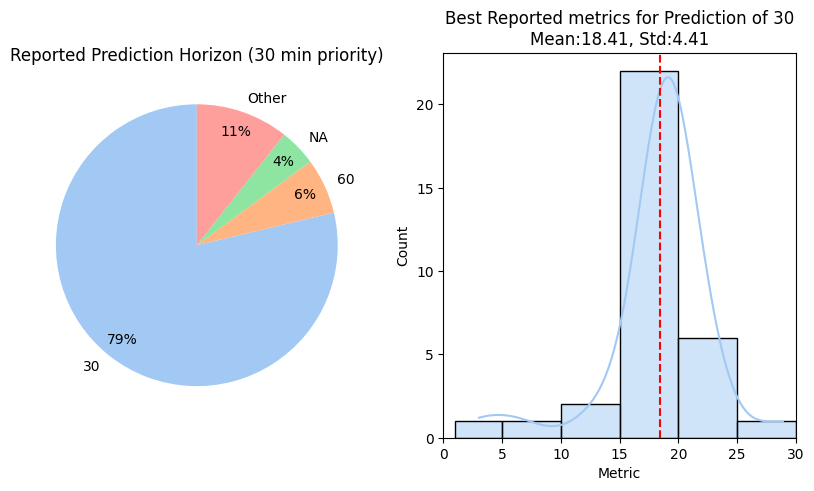

In [32]:
# plot the best_reported_sh
non_simul_df = df[~df['Public Datasets'].str.lower().str.contains('simulator', na=False)]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot a histogram of best reported metric with custom bins
custom_bins = [1, 5, 10, 15, 20, 25, 30]
sns.histplot(data=non_simulated_brm, x='Metric', bins=custom_bins, kde=True, ax=ax[1])

print(len(non_simulated_brm))
ax[1].set_title('Best Reported metrics for Prediction of 30\nMean:{:.2f}, Std:{:.2f}'.format(
    non_simulated_brm['Metric'].mean(), 
    non_simulated_brm['Metric'].std()))

# draw line on mean
ax[1].axvline(non_simulated_brm['Metric'].mean(), color='red', linestyle='--')

# Set x-axis limits to better visualize the data
ax[1].set_xlim(0, 30)

# Plot the best reported sampling horizon on ax[0]
y = non_simul_df['best_reported_sh'].values
y = pd.Series([i for x in y for i in x.split(',')])
y = y.str.strip()
y = y.value_counts()
y.loc['Other'] = y[y == 1].sum()
y = y[y > 1]
y = y / y.sum() * 100

ax[0].pie(y, labels=y.index, autopct=lambda p: f'{p:.0f}%', startangle=90, pctdistance=0.85)
ax[0].set_title('Reported Prediction Horizon (30 min priority)')

plt.show()

In [33]:
y

30       78.723404
60        6.382979
NA        4.255319
Other    10.638298
Name: count, dtype: float64

30       81.132075
60        5.660377
NA        3.773585
Other     9.433962
Name: count, dtype: float64

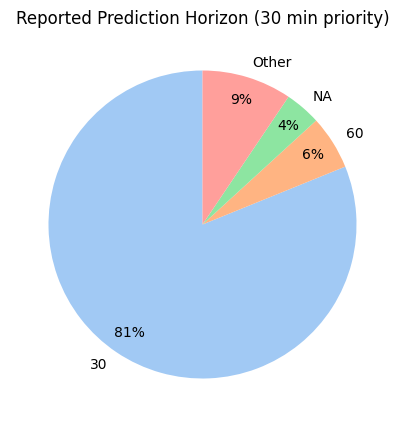

In [34]:
# pie chart of best reported sampling horizon

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y = df['best_reported_sh'].values
# split on the comma
y = pd.Series([i for x in y for i in x.split(',')])
y = y.str.strip()
# get the value counts
y = y.value_counts()

# merge the ones with 1 count into a single category
y.loc['Other'] = y[y == 1].sum()
y = y[y > 1]

# Convert to percentages
y = y / y.sum() * 100

ax.pie(y, labels=y.index, autopct=lambda p: f'{p:.0f}%', startangle=90, pctdistance=0.85)
ax.set_title('Reported Prediction Horizon (30 min priority)')

# don't render the plot

y